In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
myFiles = '/content/drive/My Drive/Colab Notebooks/Logistic Regression as a Neural Network'
os.chdir(myFiles)

In [ ]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

# Part 0: Building the Binary Classification Model Using Logistic Regression via Neural Network From Scratch

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = (1 / (1 + np.exp(-1 * z)))
    
    return s

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    """
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                      # compute activation
    cost = -1 / m * (np.matmul(Y, np.log(A).T) + np.matmul((1-Y), np.log(1 - A).T))   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if(A[0, i] > 0.5):
          Y_prediction[0,i] = 1
        else:
          Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


IndexError: ignored

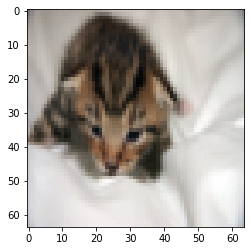

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

# Part 1: Testing the Binary Classification Model on the MNIST Dataset

In [ ]:
#Get required data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Reshape and flatten data
X_train = np.asarray(train_images.reshape(train_images.shape[0],-1).T)
X_test = np.asarray(test_images.reshape(test_images.shape[0],-1).T)

#Create a batch of the corresponding correct labels of size 10,000
Y_train = train_labels
Y_test = test_labels

print ("x_train shape: " + str(X_train.shape))
print ("y_train shape " + str(Y_train.shape))
print ("x_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(Y_test.shape))

X_train = X_train / 255
X_train = X_train[0:10000]
X_test = X_test/ 255

#Ensure this subset is a roughly accurate representation of the whole dataset
print(np.asarray(np.unique(Y_train, return_counts=True)))

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (784, 60000)
y_train shape (60000,)
x_test shape: (784, 10000)
y_test shape: (10000,)
[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]


In [ ]:
#Transition model to represent our binary classifier (1 if odd, 0 if even)
Y_train[Y_train % 2 != 0] = 1
Y_test[Y_test % 2 != 0] = 1
Y_train[Y_train % 2 == 0] = 0
Y_test[Y_test % 2 == 0] = 0

In [ ]:
#Model using MNIST dataset
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.411035
Cost after iteration 200: 0.366434
Cost after iteration 300: 0.342660
Cost after iteration 400: 0.328580
Cost after iteration 500: 0.319049
Cost after iteration 600: 0.312168
Cost after iteration 700: 0.307003
Cost after iteration 800: 0.302994
Cost after iteration 900: 0.299791
Cost after iteration 1000: 0.297170
Cost after iteration 1100: 0.294979
Cost after iteration 1200: 0.293115
Cost after iteration 1300: 0.291506
Cost after iteration 1400: 0.290100
Cost after iteration 1500: 0.288856
Cost after iteration 1600: 0.287746
Cost after iteration 1700: 0.286747
Cost after iteration 1800: 0.285842
Cost after iteration 1900: 0.285018
train accuracy: 88.58166666666666 %
test accuracy: 88.57 %


In [ ]:
#Get predictions from d
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
Y_prediction_test = np.squeeze(d['Y_prediction_test'])
Y_prediction_train = np.squeeze(d['Y_prediction_train'])

#Get indicies of incorrect predictions
index_test = np.argwhere(Y_prediction_test != Y_test)
index_train = np.argwhere(Y_prediction_train != Y_train)

#Get incorrect values from the original MNIST dataset
incorrectTest = np.asarray(np.unique(np.take(test_labels, index_test), return_counts=True))
incorrectTrain = np.asarray(np.unique(np.take(train_labels, index_train), return_counts=True))

#Print out the number of incorrect labels from each
print(incorrectTest[0])
print(incorrectTest[1] + incorrectTrain[1])

[0 1 2 3 4 5 6 7 8 9]
[ 741  136 1018  275 1784  766  213  160 2346  555]


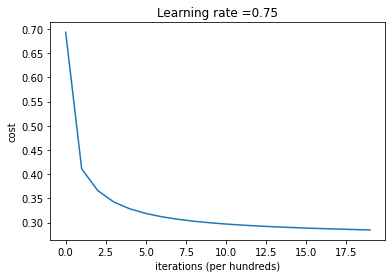

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
# Try different learning rates and compare 
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
# Try bigger learning rates and compare 
learning_rates = [1, 0.75, 0.5, 0.25]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

# Part 2: Extending the Framework for Multi-Class Classification Using a 2-Layer Network



In [ ]:
#Get required data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Reshape and flatten data
X_train = np.asarray(train_images.reshape(train_images.shape[0],-1).T)
X_test = np.asarray(test_images.reshape(test_images.shape[0],-1).T)

X_train = X_train / 255
X_train = X_train.astype(np.float128)
X_test = X_test/ 255
X_test = X_test.astype(np.float128)

#Create a Y_train and Y_test from the labels
Y_train = train_labels
Y_test = test_labels

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print ("x_train shape: " + str(X_train.shape))
print ("y_train shape " + str(Y_train.shape))
print ("x_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(Y_test.shape))

x_train shape: (784, 60000)
y_train shape (60000, 10)
x_test shape: (784, 10000)
y_test shape: (10000, 10)


In [ ]:
def softmax(z):
    """
    Compute the softmax of z(i)

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- softmax(z)
    """

    s = np.exp(z)
    return s / np.sum(s, axis = 1, keepdims=True)

In [ ]:
def relu(z):
   return np.maximum(0.0,z)

In [ ]:
def reluPrime(z):
   z[z<=0] = 0
   z[z>0] = 1
   return z

In [ ]:
def initialize_with_zeros2(dim, numnodes):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 10)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, numnodes))
    w = w.astype(np.float128)
    b = np.zeros((numnodes, 1))

    
    return w, b

In [ ]:
def propagate2(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    Output Layer:
    w1 -- weights, a numpy array of size (10, 1)
    b1 -- bias, a numpy array of size (1, 10)
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)

    #output layer
    z1 = np.matmul(w.T, X) + b
    a1 = softmax(z1)
    cost = np.sum(-1 / m * (np.matmul(Y, np.log(a1).T) + np.matmul(1-Y, np.log(1 - a1).T)))
    # BACKWARD PROPAGATION (TO FIND GRAD) using Prof Ng's Formulas
    dz = a1 - Y
    dw = 1 / m * np.matmul(X, (dz).T)
    db = 1 / m * np.sum(dz)

    #assert(dw.shape == w.shape)
    cost = np.squeeze(cost)
    assert(cost.shape == (()))
    
    grads = {"dw": dw,
             "db": db,}
    
    return grads, cost

In [ ]:
def optimize2(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w1, b1 and w2, b2 by running a gradient descent algorithm
    
    Arguments:
    Output Layer:
    w -- weights, a numpy array of size (num_px * num_px * 3, 10)
    b -- bias, a numpy array of size (1, 10)

    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w1, w2 and bias b1, b2
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate2(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b,}
     
    grads = {"dw": dw,
             "db": db,}
    
    return params, grads, costs

In [ ]:
def predict2(w, b, X):
    '''
    Predict label using learned logistic regression parameters (w1, b1, w2, b2)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 10)
    b -- bias, a numpy array of size (1, 10)
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    w = w.reshape(X.shape[0], 10)
    Y_prediction = np.zeros((10, m))

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    z1 = np.dot(w.T, X) + b
    A1 = softmax(z1)
    pred = np.argmax(A1, axis=0)
    for i in range(A1.shape[1]):
      Y_prediction[pred[i], i] = 1

    return Y_prediction
    #Y_prediction

In [ ]:
def model2(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros for hidden layer and output layer
    w, b = initialize_with_zeros2(X_train.shape[0], 10)

    # Gradient descent
    parameters, grads, costs = optimize2(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict2(w, b, X_test)
    Y_prediction_train = predict2(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
#Model using MNIST dataset
d = model2(X_train, Y_train.T, X_test, Y_test.T, num_iterations = 25, learning_rate = 0.05, print_cost = True)

Cost after iteration 0: 110.022498
train accuracy: 92.84866666666667 %
test accuracy: 92.584 %
